<a href="https://colab.research.google.com/github/ollihansen90/Mathe-SH/blob/main/Schachcomputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Schachcomputer


## Klassen

In [1]:
#https://raw.githubusercontent.com/prateeksan/chesspi/development/sample_data/Kasparov.pgn
# TODO: Patt, (Rochade), En Passant, (Bauernumwandlung)
from random import randint

bauer = 1 # 1
springer = 2 # 3
laeufer = 3 # 3
turm = 4 # 5
dame = 5 # 9
koenig = 6 # 1000
leer = 0
figuren = ["\u2659", "\u2659","\u2658","\u2657","\u2656","\u2655","\u2654","\u265A","\u265B","\u265C","\u265D","\u265E","\u265F"]
wertigkeit = [0, 1, 3, 3, 5, 9, 1000]

def flip_pos(pos):
    """
    Funktion, die das Brett dreht.
    Args:
        pos: Position des Feldes
    Returns:
        Position des Feldes nach Drehung

    Beispiel:
        "D4" wird zu "D5"
        "D5" wird zu "D4"
    """
    # Rxc7+  -> rest = Rx, pos = c7 -> Rxc2
    # g8=Q
    rest = ""
    ende = ""
    pos = pos.replace("+", "")
    if "=" in pos:
        ende = pos[-2:]
        pos = pos[:-2]
    if len(pos)>2:
        rest = pos[:-2]
        pos = pos[-2:]
    pos = pos[0]+str(9-int(pos[1]))
    return rest+pos+ende

def get_index(pos):
    """
    Funktion, die eine Position in Koordinaten übersetzt.
    Args:
        pos: Position des Feldes
    Returns:
        Liste [Zeile, Spalte]
    Beispiel:
        "D4" wird zu [3,4]
    """
    pos = pos.upper()
    assert pos[0] in "ABCDEFGH" and pos[1] in "12345678", pos+" ist keine gültige Position."

    counter = 0
    for buchstabe in "ABCDEFGH":
        if buchstabe==pos[0]:
            break
        counter += 1

    liste = [8-int(pos[1]), counter]
    return liste

class Spielfeld():
    """
    Klasse, die das Spielbrett repräsentiert.
    """
    def __init__(self):
        """
        Konstruktor, der das Spielbrett erstellt.
        """
        #self.feld = None
        self.reset()

    def reset(self):
        """
        Setzt das Spielfeld auf Anfang zurück.
        """
        self.feld = [
            [-turm, -springer, -laeufer, -dame, -koenig, -laeufer, -springer, -turm],
            [-bauer, -bauer, -bauer, -bauer, -bauer, -bauer, -bauer, -bauer],
            [leer, leer, leer, leer, leer, leer, leer, leer],
            [leer, leer, leer, leer, leer, leer, leer, leer],
            [leer, leer, leer, leer, leer, leer, leer, leer],
            [leer, leer, leer, leer, leer, leer, leer, leer],
            [bauer, bauer, bauer, bauer, bauer, bauer, bauer, bauer],
            [turm, springer, laeufer, dame, koenig, laeufer, springer, turm]
        ]

    def male(self):
        """
        Gibt das Spielfeld auf der Konsole aus.
        """
        output = ''
        bg = ["\x1b[47m", "\x1b[107m"]
        leer_farbe = ["\x1b[37m", "\x1b[97m"]
        counter = 0
        for reihe in self.feld:
            counter += 1
            for feld in reihe:
                if feld == 0:
                    output += bg[counter%2]+leer_farbe[counter%2]+figuren[feld]
                else:
                    output += bg[counter%2]+"\x1b[30m"+figuren[feld]
                counter += 1
            output += '\n'
        output += "\x1b[0m"
        print(output)

    def __getitem__(self, pos):
        """
        Gibt an, was auf einem Feld steht.
        Args:
            pos: Position des Feldes
        Returns:
            Figurenwert
        Beispiel:
            "D2" wird zu 1
        """
        liste = get_index(pos)
        return self.feld[liste[0]][liste[1]]

    def __setitem__(self, pos, value):
        """
        Setzt das Feld auf einen neuen Wert.
        Args:
            pos: Position des Feldes
            value: neuer Wert
        """
        liste = get_index(pos)
        self.feld[liste[0]][liste[1]] = value

    def flip(self):
        """
        Flippt das Spielfeld.
        """
        self.feld = self.feld[::-1]

    def invertiere(self):
        """
        Invertiert das Spielfeld.
        """
        self.flip()
        for i in range(8):
            for j in range(8):
                self.feld[i][j] = -self.feld[i][j]

def links(pos):
    """
    Bewegt nach links.
    Args:
        pos: Position des Feldes
    Returns:
        Position des Feldes nach links
    Beispiel:
        "D2" wird zu "C2"
    """
    if not pos:
        return False
    zeile = pos[1]
    spalte = pos[0]
    spalte_neu = ord(spalte)-1
    if spalte_neu>=65:
        return chr(spalte_neu)+zeile
    else:
        return False

def rechts(pos):
    """
    Bewegt nach rechts.
    Args:
        pos: Position des Feldes
    Returns:
        Position des Feldes nach rechts
    Beispiel:
        "D2" wird zu "E2"
    """
    if not pos:
        return False
    zeile = pos[1]
    spalte = pos[0]
    spalte_neu = ord(spalte)+1
    if spalte_neu<=72:
        return chr(spalte_neu)+zeile
    else:
        return False

def vor(pos):
    """
    Bewegt nach vorne.
    Args:
        pos: Position des Feldes
    Returns:
        Position des Feldes nach vorne
    Beispiel:
        "D2" wird zu "D3"
    """
    if not pos:
        return False
    zeile = pos[1]
    spalte = pos[0]
    zeile_neu = int(pos[1])+1
    if zeile_neu<=8:
        return spalte+str(zeile_neu)
    else:
        return False

def zurueck(pos):
    """
    Bewegt nach hinten.
    Args:
        pos: Position des Feldes
    Returns:
        Position des Feldes nach hinten
    Beispiel:
        "D2" wird zu "D1"
    """
    if not pos:
        return False
    zeile = pos[1]
    spalte = pos[0]
    zeile_neu = int(pos[1])-1
    if zeile_neu>=1:
        return spalte+str(zeile_neu)
    else:
        return False

def bewege_bauer(schachbrett, pos, pos_neu=None):
    """
    Bewegt einen Bauern auf bestimmter Position zu neuer Position.
    Args:
        pos: Position des Feldes
        pos_neu: Position des Feldes nach dem Zug

    """
    assert abs(schachbrett[pos])==bauer, "Hier steht kein Bauer."

    schachbrett[pos] = leer
    if pos_neu is None:
        pos_neu = get_bewegung_bauer(schachbrett, pos)
        pos_neu = pos_neu[randint(0,len(pos_neu)-1)]
    if pos_neu[-1]==8:
        schachbrett[pos_neu] = dame
    else:
        schachbrett[pos_neu] = bauer

def bewege_springer(schachbrett, pos, pos_neu=None):
    """
    Bewegt einen Springer auf bestimmter Position zu neuer Position.
    Args:
        pos: Position des Feldes
        pos_neu: Position des Feldes nach dem Zug
    """
    assert abs(schachbrett[pos])==springer, "Hier steht kein Springer."

    schachbrett[pos] = leer
    if pos_neu is None:
        pos_neu = get_bewegung_springer(schachbrett, pos)
        pos_neu = pos_neu[randint(0,len(pos_neu)-1)]
    schachbrett[pos_neu] = springer

def bewege_turm(schachbrett, pos, pos_neu=None):
    # Checkliste: Ist da Bauer? Kann er sich bewegen?
    assert abs(schachbrett[pos])==turm, "Hier steht kein Turm."

    schachbrett[pos] = leer
    if pos_neu is None:
        pos_neu = get_bewegung_turm(schachbrett, pos)
        pos_neu = pos_neu[randint(0,len(pos_neu)-1)]
    schachbrett[pos_neu] = turm

def bewege_laeufer(schachbrett, pos, pos_neu=None):
    # Checkliste: Ist da Bauer? Kann er sich bewegen?
    assert abs(schachbrett[pos])==laeufer, "Hier steht kein Läufer."

    schachbrett[pos] = leer
    if pos_neu is None:
        pos_neu = get_bewegung_laeufer(schachbrett, pos)
        pos_neu = pos_neu[randint(0,len(pos_neu)-1)]
    schachbrett[pos_neu] = laeufer

def bewege_dame(schachbrett, pos, pos_neu=None):
    # Checkliste: Ist da Bauer? Kann er sich bewegen?
    assert abs(schachbrett[pos])==dame, "Hier steht keine Dame."

    schachbrett[pos] = leer
    if pos_neu is None:
        pos_neu = get_bewegung_dame(schachbrett, pos)
        pos_neu = pos_neu[randint(0,len(pos_neu)-1)]
    schachbrett[pos_neu] = dame

def bewege_koenig(schachbrett, pos, pos_neu=None):
    # Checkliste: Ist da Bauer? Kann er sich bewegen?
    assert abs(schachbrett[pos])==koenig, "Hier steht kein König."

    schachbrett[pos] = leer
    if pos_neu is None:
        pos_neu = get_bewegung_koenig(schachbrett, pos)
        pos_neu = pos_neu[randint(0,len(pos_neu)-1)]
    schachbrett[pos_neu] = koenig

def get_bewegung_dame(schachbrett, pos):
    return get_bewegung_laeufer(schachbrett, pos)+get_bewegung_turm(schachbrett, pos)

def get_bewegung_koenig(schachbrett, pos):
    output = []
    figur = schachbrett[pos]
    # Springe 1 nach vorne
    pos_neu = vor(pos)
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    # Springe 1 nach vorne rechts
    pos_neu = vor(rechts(pos))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    # Springe 1 nach vorne links
    pos_neu = vor(links(pos))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    # Springe 1 nach rechts
    pos_neu = rechts(pos)
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    # Springe 1 nach hinten rechts
    pos_neu = rechts(zurueck(pos))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    # Springe 1 nach hinten
    pos_neu = zurueck(pos)
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    # Springe 1 nach hinten links
    pos_neu = zurueck(links(pos))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    # Springe 1 nach links
    pos_neu = links(pos)
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)

    # TODO: Rochade
    return output

def get_bewegung_bauer(schachbrett, pos):
    output = []
    figur = schachbrett[pos]
    # Springe 1 nach vorne
    pos_neu = vor(pos)
    if schachbrett[pos_neu]==leer and pos_neu:
        output.append(pos_neu)
    # Springe 2 nach vorne, falls du dich noch nicht bewegt hast
    pos_neu = vor(vor(pos))
    if pos[1]=="2" and len(output)==1 and schachbrett[pos_neu]==leer:
        output.append(pos_neu)
    # Springe 1 diagonal nach vorne, falls da ein Gegner sitzt
    # Oben rechts von B2 ist C3
    pos_neu = rechts(vor(pos))
    if pos_neu and figur*schachbrett[pos_neu]<0:
        output.append(pos_neu)
    pos_neu = links(vor(pos))
    if pos_neu and figur*schachbrett[pos_neu]<0:
        output.append(pos_neu)
    # TODO: En Passant
    return output

def get_bewegung_turm(schachbrett, pos):
    output = []
    figur = schachbrett[pos]
    # vor
    pos_neu = vor(pos)
    while pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
        if figur*schachbrett[pos_neu]<0:
            break
        pos_neu = vor(pos_neu)

    # links
    pos_neu = links(pos)
    while pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
        if figur*schachbrett[pos_neu]<0:
            break
        pos_neu = links(pos_neu)

    # rechts
    pos_neu = rechts(pos)
    while pos_neu and ((schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0)):
        output.append(pos_neu)
        if figur*schachbrett[pos_neu]<0:
            break
        pos_neu = rechts(pos_neu)

    # zurueck
    pos_neu = zurueck(pos)
    while pos_neu and ((schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0)):
        output.append(pos_neu)
        if figur*schachbrett[pos_neu]<0:
            break
        pos_neu = zurueck(pos_neu)

    # TODO: Rochade
    return output

def get_bewegung_laeufer(schachbrett, pos):
    output = []
    figur = schachbrett[pos]
    # diagonal rechts vor
    pos_neu = rechts(vor(pos))
    while pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        #print("diagonal rechts vor", pos_neu)
        output.append(pos_neu)
        if figur*schachbrett[pos_neu]<0:
            break
        pos_neu = rechts(vor(pos_neu))

    # diagonal links vor
    pos_neu = vor(links(pos))
    while pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        #print("diagonal links vor",pos_neu)
        output.append(pos_neu)
        if figur*schachbrett[pos_neu]<0:
            break
        pos_neu = vor(links(pos_neu))

    # diagonal links zurück
    pos_neu = links(zurueck(pos))
    while pos_neu and ((schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0)):
        #print("diagonal links zurück",pos_neu)
        output.append(pos_neu)
        if figur*schachbrett[pos_neu]<0:
            break
        pos_neu = links(zurueck(pos_neu))

    # diagonal rechts zurück
    pos_neu = rechts(zurueck(pos))
    while pos_neu and ((schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0)):
        #print("diagonal rechts zurück",pos_neu)
        output.append(pos_neu)
        if figur*schachbrett[pos_neu]<0:
            break
        pos_neu = rechts(zurueck(pos_neu))

    return output

def get_bewegung_springer(schachbrett, pos):
    output = []
    figur = schachbrett[pos]
    pos_neu = rechts(vor(vor(pos)))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    pos_neu = links(vor(vor(pos)))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    pos_neu = rechts(rechts(vor(pos)))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    pos_neu = rechts(rechts(zurueck(pos)))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    pos_neu = rechts(zurueck(zurueck(pos)))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    pos_neu = links(zurueck(zurueck(pos)))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    pos_neu = links(links(zurueck(pos)))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    pos_neu = links(links(vor(pos)))
    if pos_neu and (schachbrett[pos_neu]==leer or figur*schachbrett[pos_neu]<0):
        output.append(pos_neu)
    return output

def rochade(schachbrett, z):
    """
    Macht eine Rochade.
    Args:
        schachbrett: Spielfeld
        z: Richtung
    """
    # O-O-O
    # O-O
    if z=="O-O": # Kurze Rochade
        bewege_koenig(schachbrett, "E1", "G1")
        bewege_turm(schachbrett, "H1", "F1")
    elif z=="O-O-O": # Lange Rochade
        bewege_koenig(schachbrett, "E1", "C1")
        bewege_turm(schachbrett, "A1", "D1")

def get_alle_bewegungen(schachbrett):
    """
    Funktion, die alle Bewegungen bestimmt.
    Args:
        schachbrett: Spielfeld
    """
    bewegungsfunc = [
            lambda x: [z.lower() for z in get_bewegung_bauer(schachbrett,x)],
            lambda x: ["N" + z.lower() for z in get_bewegung_springer(schachbrett,x)],
            lambda x: ["B" + z.lower() for z in get_bewegung_laeufer(schachbrett,x)],
            lambda x: ["R" + z.lower() for z in get_bewegung_turm(schachbrett,x)],
            lambda x: ["Q" + z.lower() for z in get_bewegung_dame(schachbrett,x)],
            lambda x: ["K" + z.lower() for z in get_bewegung_koenig(schachbrett,x)]
        ]
    output = []
    for i in range(8):
        for j in range(8):
            figur = schachbrett.feld[i][j]
            if figur>0:
                output.extend(bewegungsfunc[figur-1]("ABCDEFGH"[j]+str(8-i)))
    return output

def zug(schachbrett, z):
    print(z)
    if z[0]=="O":
        return rochade(schachbrett, z)
    if z[0].upper()!=z[0]:
        figur = bauer
        pos_neu = z.upper()
        get_bewegung = get_bewegung_bauer
        bewege = bewege_bauer
    elif z[0]=="K":
        figur = koenig
        pos_neu = z.upper()[-2:]
        get_bewegung = get_bewegung_koenig
        bewege = bewege_koenig
    elif z[0]=="N":
        figur = springer
        pos_neu = z.upper()[-2:]
        get_bewegung = get_bewegung_springer
        bewege = bewege_springer
    elif z[0]=="R":
        figur = turm
        pos_neu = z.upper()[-2:]
        get_bewegung = get_bewegung_turm
        bewege = bewege_turm
    elif z[0]=="B":
        figur = laeufer
        pos_neu = z.upper()[-2:]
        get_bewegung = get_bewegung_laeufer
        bewege = bewege_laeufer
    elif z[0]=="Q":
        figur = dame
        pos_neu = z.upper()[-2:]
        get_bewegung = get_bewegung_dame
        bewege = bewege_dame

    for i in range(8):
        for j in range(8):
            if schachbrett.feld[i][j]==figur:
                b = get_bewegung(schachbrett, "ABCDEFGH"[j]+str(8-i))#, "ABCDEFGH"[j]+str(8-i)
                if pos_neu in b:
                    return bewege(schachbrett, "ABCDEFGH"[j]+str(8-i), pos_neu)
    print("Ungültiger Zug.")
    return False


if False:
    schachbrett.reset()
    #schachbrett["B1"] = leer
    #schachbrett["C1"] = leer
    #schachbrett["D1"] = leer
    #schachbrett["F1"] = leer
    #schachbrett["G1"] = leer
    schachbrett["E2"] = leer
    #schachbrett.male()
    #print(get_bewegung_koenig(schachbrett, "D3"))
    #rochade(schachbrett, "O-O")
    schachbrett.male()

    #print(get_bewegung_laeufer(schachbrett, "C1"))
    #print(["N"+z.lower() for z in get_bewegung_springer(schachbrett, "B1")])
    #print("['Nc3', 'Na3']")
    moegliche_zuege = get_alle_bewegungen(schachbrett)
    print(moegliche_zuege)
    print(moegliche_zuege[randint(0,len(moegliche_zuege)-1)])

    schachbrett = Spielfeld()
    schachbrett2 = Spielfeld()
    schachbrett.male()

    schachbrett["E2"] = leer
    schachbrett["E3"] = bauer
    schachbrett.male()

## Bewegungen

## Züge

In [ ]:
schachbrett = Spielfeld()
schachbrett.reset()
schachbrett.male()

while True:
    print(get_alle_bewegungen(schachbrett))
    z = input("Weiß gibt einen Zug ein: ")
    while True:
        if zug(schachbrett, z) == None:
            break
        z = input("Weiß gibt einen Zug ein: ")
    schachbrett.male()

    schachbrett.invertiere()
    if False:
        z = input("Schwarz gibt einen Zug ein: ")
        z = flip_pos(z)
        while True:
            if zug(schachbrett, z) == None:
                break
            z = input("Schwarz gibt einen Zug ein: ")
            z = flip_pos(z)

    zuege = get_alle_bewegungen(schachbrett)
    z = zuege[randint(0,len(zuege)-1)]
    zug(schachbrett, z)
    schachbrett.invertiere()
    schachbrett.male()

    schwarzer_koenig = False
    weisser_koenig = False
    for i in range(8):
        for j in range(8):
            if abs(schachbrett.feld[i][j])==koenig:
                if schachbrett.feld[i][j]>0:
                    weisser_koenig = True
                else:
                    schwarzer_koenig = True
    if weisser_koenig and not schwarzer_koenig:
        print("Weiß hat gewonnen!")
        break
    elif schwarzer_koenig and not weisser_koenig:
        print("Schwarz hat gewonnen!")
        break


# Später

In [ ]:
def berechne_wert(schachbrett):
    # https://chessify.me/blog/chess-engine-evaluation
    # 1. Zähle Figuren mit Wertungen
    # 2. Positionswertungen
    # 2.1 Bedrohte Figuren
    # 2.2 König steht rochiert,...
    wertung = 0

    # Wertigkeiten
    summe_w = 0
    summe_s = 0
    for i in range(8):
        for j in range(8):
            if schachbrett.feld[i][j]>0:
                summe_w += wertigkeit[abs(schachbrett.feld[i][j])]
            if schachbrett.feld[i][j]<0:
                summe_s += wertigkeit[abs(schachbrett.feld[i][j])]
    wertung += summe_w-summe_s

    # Anzahl möglicher Züge
    zuege_w = len(get_alle_bewegungen(schachbrett))
    schachbrett.invertiere()
    zuege_s = len(get_alle_bewegungen(schachbrett))
    schachbrett.invertiere()
    wertung += 0.5*(zuege_w-zuege_s)

    # Anzahl gedoppelter Bauern
    doppelt_w = 0
    doppelt_s = 0
    for spalte in range(8):
        w = 0
        s = 0
        for zeile in range(8):
            if schachbrett.feld[zeile][spalte]==1:
                w += 1
            if schachbrett.feld[zeile][spalte]==-1:
                s += 1
        if w>0:
            doppelt_w += w-1
        if s>0:
            doppelt_s += s-1
    wertung -= 0.1*(doppelt_w-doppelt_s)

    return wertung

schachbrett = Spielfeld()
schachbrett.reset()
schachbrett["A5"] = bauer
schachbrett.male()
print(berechne_wert(schachbrett))
schachbrett.male()

♜♞♝♛♚♝♞♜
♟♟♟♟♟♟♟♟
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♖♘♗♕♔♗♘♖

2.0
♜♞♝♛♚♝♞♜
♟♟♟♟♟♟♟♟
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♙♙♙♙♙♙♙♙
♖♘♗♕♔♗♘♖



In [ ]:
!wget https://raw.githubusercontent.com/prateeksan/chesspi/development/sample_data/Kasparov.pgn -O "Kasparov.txt"

--2024-06-26 16:32:57--  https://raw.githubusercontent.com/prateeksan/chesspi/development/sample_data/Kasparov.pgn
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1284144 (1.2M) [application/octet-stream]
Saving to: ‘Kasparov.txt’

Kasparov.txt        100%[===================>]   1.22M  --.-KB/s    in 0.03s   

2024-06-26 16:32:57 (44.1 MB/s) - ‘Kasparov.txt’ saved [1284144/1284144]



In [ ]:
with open("Kasparov.txt", "rb") as file:
    zeilen = file.readlines()


In [ ]:
spiele = ("\n".join([z.decode('ascii').strip() for z in zeilen[:34000]])).split("\n\n")[1::2]
print(len(spiele))


1907


In [ ]:
print(spiele[0])

1.e4 c5 2.c3 Nf6 3.e5 Nd5 4.d4 Nc6 5.Nf3 cxd4 6.cxd4 e6 7.a3 d6 8.Bd3 Qa5+
9.Bd2 Qb6 10.Nc3 Nxc3 11.Bxc3 dxe5 12.dxe5 Be7 13.O-O Bd7 14.Nd2 Qc7 15.Qg4 O-O-O
16.Rfc1 Kb8 17.Qc4 Rc8 18.b4 f6 19.Nf3 Qb6 20.Qe4 f5 21.Qe1 a6 22.Rab1 g5
23.Nd2 Nd4 24.Qe3 Rxc3 25.Rxc3 f4 26.Qe1 g4 27.Ne4 Bc6 28.Nc5 Ka7 29.a4 Bf3
30.a5 Qd8 31.Bc4 Bxc5 32.bxc5 Qh4 33.gxf3 gxf3 34.Kh1 Rg8 35.Qe4 Rg7 36.Qxd4 Qg5
37.c6+ Kb8 38.c7+ Rxc7 39.Rg1 Qh5 40.Rg8+ Rc8 41.Qd6+ Ka7  1-0


In [ ]:
spielliste = []

for spiel in spiele:
    spiel = spiel.replace("\n", " ")
    spiel_ohne_ergebnis = spiel.split("  ")[0]+"  "
    zugliste = [z.split(" ")[:2] for z in spiel_ohne_ergebnis.split(".")[1:]]
    spielliste.append(zugliste)

In [ ]:
print(*spielliste[0], sep="\n")

['e4', 'c5']
['c3', 'Nf6']
['e5', 'Nd5']
['d4', 'Nc6']
['Nf3', 'cxd4']
['cxd4', 'e6']
['a3', 'd6']
['Bd3', 'Qa5+']
['Bd2', 'Qb6']
['Nc3', 'Nxc3']
['Bxc3', 'dxe5']
['dxe5', 'Be7']
['O-O', 'Bd7']
['Nd2', 'Qc7']
['Qg4', 'O-O-O']
['Rfc1', 'Kb8']
['Qc4', 'Rc8']
['b4', 'f6']
['Nf3', 'Qb6']
['Qe4', 'f5']
['Qe1', 'a6']
['Rab1', 'g5']
['Nd2', 'Nd4']
['Qe3', 'Rxc3']
['Rxc3', 'f4']
['Qe1', 'g4']
['Ne4', 'Bc6']
['Nc5', 'Ka7']
['a4', 'Bf3']
['a5', 'Qd8']
['Bc4', 'Bxc5']
['bxc5', 'Qh4']
['gxf3', 'gxf3']
['Kh1', 'Rg8']
['Qe4', 'Rg7']
['Qxd4', 'Qg5']
['c6+', 'Kb8']
['c7+', 'Rxc7']
['Rg1', 'Qh5']
['Rg8+', 'Rc8']
['Qd6+', 'Ka7']


[[0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]]


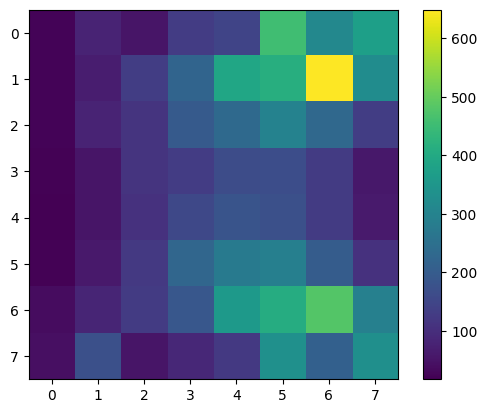

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

feld = np.zeros([8,8])
pos = get_index("B1")
feld[pos[0], pos[1]] += 1
pos = get_index("G1")
feld[pos[0], pos[1]] += 1
pos = get_index("B8")
feld[pos[0], pos[1]] += 1
pos = get_index("G8")
feld[pos[0], pos[1]] += 1

print(feld)
for zugliste in spielliste:
    for zug in zugliste:
        for z in zug:
            z = z.replace("+", "")
            if len(z)>0 and z[0]=="K":
                pos = get_index(z[-2:])
                feld[pos[0], pos[1]] += 1

plt.figure()
plt.imshow(feld)
plt.colorbar()
plt.show()
